# Project Overview

This project will assess a portfolio based on a few key metrics such as:
    - Cumaltive Return
    - Average Daily Return
    - Standard Deviation of Daily Returns
    - Sharpe Ratio of Overall Portfolio
    - Final Value of Portfolio

## Our Imports

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pandas_datareader import data
import os

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0) #default size for our charts

## Let's First Pull Data

To pull data, we will be leveraging AlphaVantage's free service to get info on stocks and cryptocurrency. The API itself is a python library developed by RomelTorres.

- Free API: https://www.alphavantage.co/
- Python API wrapper: https://github.com/RomelTorres/alpha_vantage

In [186]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.cryptocurrencies import CryptoCurrencies

ts = TimeSeries(key='R9PCESGM8SQRD71G', output_format='pandas', indexing_type='date')
MSFT = ts.get_daily_adjusted('MSFT', outputsize='compact')

## Let's Explore MSFT's Data

In [187]:
MSFT[0].describe()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
count,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.0
mean,114.899950,115.860650,114.051166,115.130800,114.601594,2.663355e+07,0.009200,1.0
std,8.967598,8.985033,8.991815,8.938296,9.126359,8.015475e+06,0.064724,0.0
min,99.550000,100.185000,97.200000,97.400000,96.630900,1.407179e+07,0.000000,1.0
25%,106.640000,107.130000,105.517500,106.785000,105.941800,2.152432e+07,0.000000,1.0
50%,114.940000,116.225000,114.460000,115.250000,114.830800,2.611519e+07,0.000000,1.0
75%,122.297500,123.640000,121.618850,123.355000,122.906375,3.080130e+07,0.000000,1.0
max,130.530000,131.370000,129.394700,130.600000,130.125000,5.563639e+07,0.460000,1.0


In [256]:
MSFT[0].head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2019-01-02,99.55,101.7500,98.9400,101.12,100.3215,35329345.0,0.0,1.0
2019-01-03,100.10,100.1850,97.2000,97.40,96.6309,42578410.0,0.0,1.0
2019-01-04,99.72,102.5100,98.9300,101.93,101.1252,44060620.0,0.0,1.0
2019-01-07,101.64,103.2681,100.9800,102.06,101.2541,35656136.0,0.0,1.0
2019-01-08,103.04,103.9700,101.7134,102.80,101.9883,31514415.0,0.0,1.0


## Let's Plot This Data

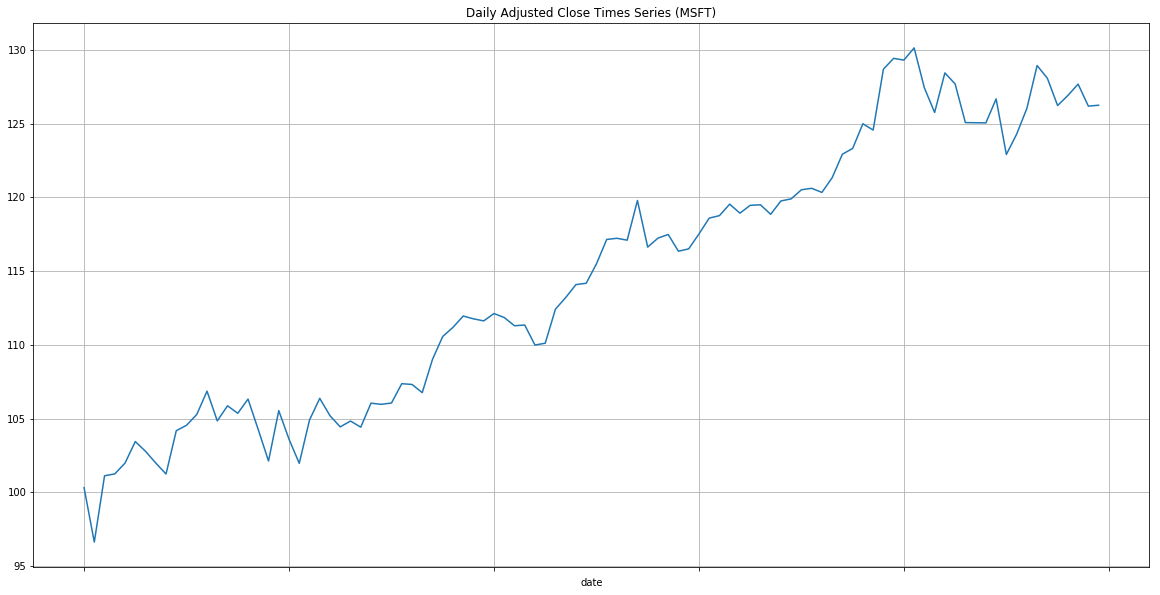

In [189]:
MSFT[0]['5. adjusted close'].plot()
plt.title('Daily Adjusted Close Times Series (MSFT)')
plt.grid()
plt.show()

## Let's Compare to the S&P 500

We Compare to the S&P 500 because..

In [190]:
SPY = ts.get_daily_adjusted('SPY', outputsize='compact')

In [191]:
SPY[0].head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2019-01-02,245.98,251.21,245.95,250.18,249.0881,126925199.0,0.0,1.0
2019-01-03,248.23,248.57,243.67,244.21,243.1442,144140692.0,0.0,1.0
2019-01-04,247.59,253.11,247.17,252.39,251.2885,142628834.0,0.0,1.0
2019-01-07,252.69,255.95,251.69,254.38,253.2698,103139100.0,0.0,1.0
2019-01-08,256.82,257.31,254.00,256.77,255.6494,102512587.0,0.0,1.0


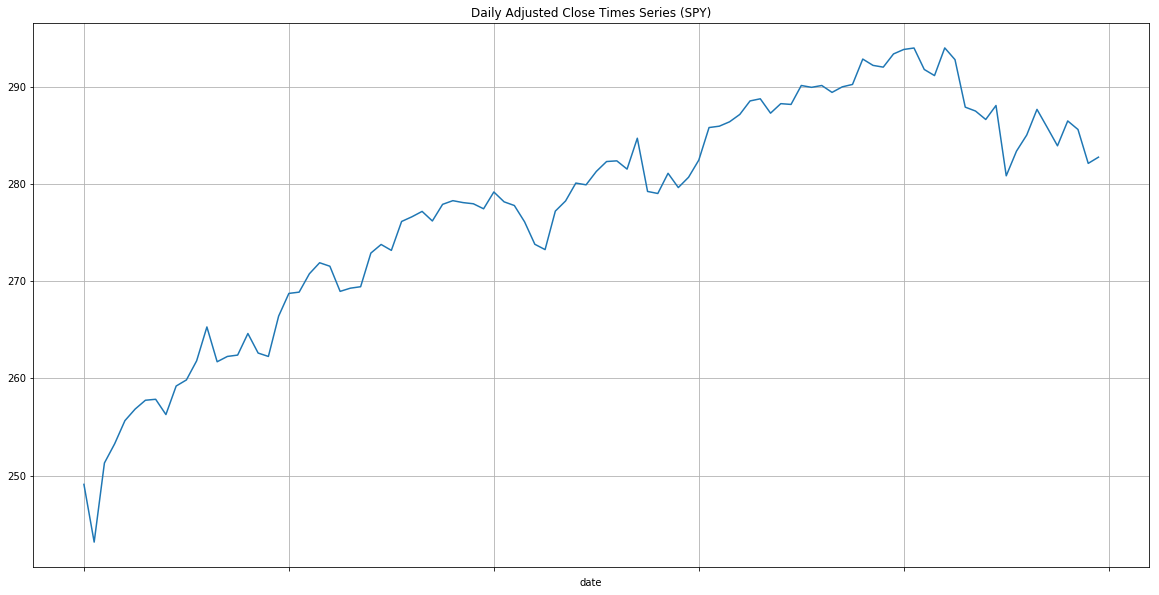

In [370]:
SPY[0]['5. adjusted close'].plot()
plt.title('Daily Adjusted Close Times Series (SPY)')
plt.grid()
plt.show()

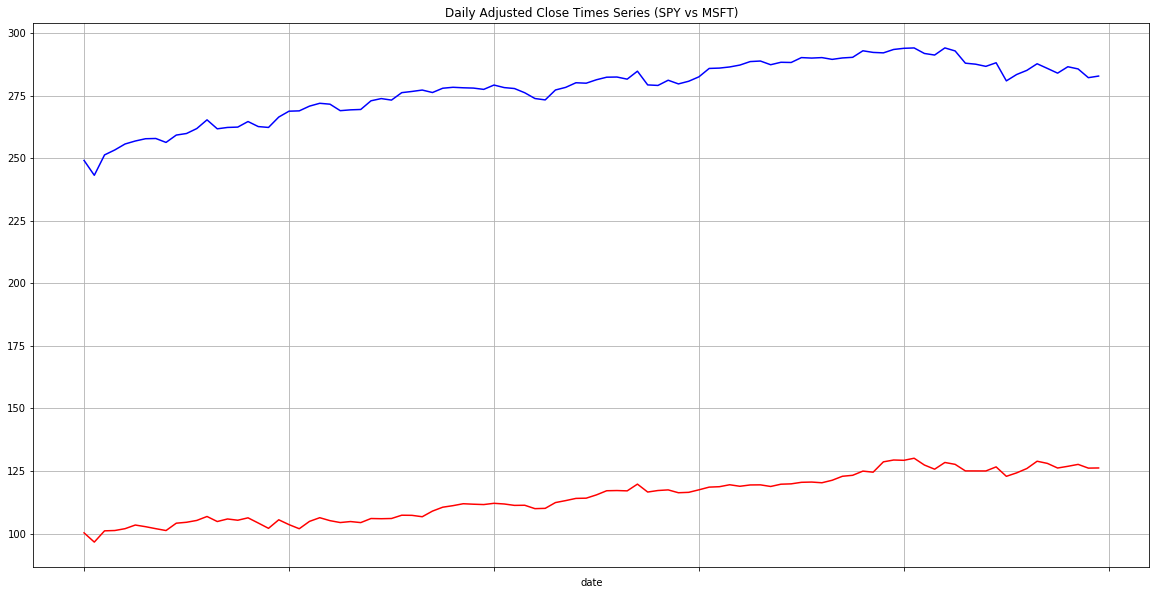

In [193]:
plt.title('Daily Adjusted Close Times Series (SPY vs MSFT)')
ax1 = SPY[0]['5. adjusted close'].plot(color='blue', grid=True, label='SPY')
ax2 = MSFT[0]['5. adjusted close'].plot(color='red', grid=True, label='MSFT')
plt.show()

## Demonstrating Bollinger Bands

Bolling Bands are essentially..

In [194]:
def r_mean(values, window=20):
    """Return rolling mean of given values, using specified window size."""
    return values.rolling(window, center=False).mean()

def r_std(values, window=20):
    """Return rolling mean of given values, using specified window size."""
    return values.rolling(window, center=False).std()

def bbands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    upper = rm + 2*rstd
    lower = rm - 2*rstd
    return (upper, lower)

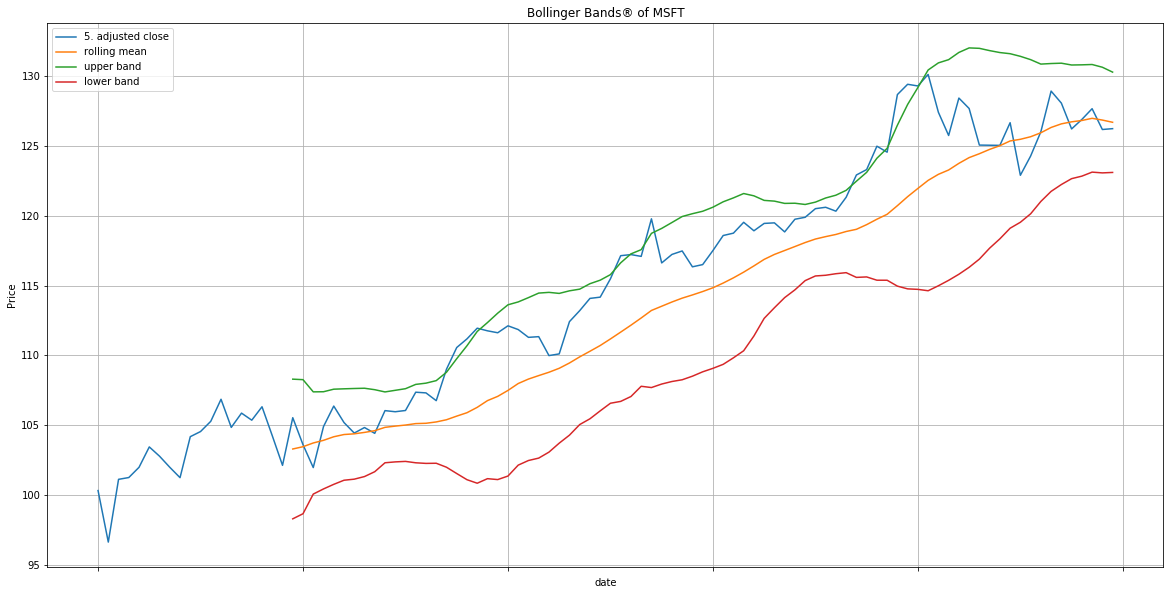

In [197]:
rm = r_mean(MSFT[0]['5. adjusted close'])
rstd = r_std(MSFT[0]['5. adjusted close'])
(upper, lower) = bbands(rm, rstd)

ax = MSFT[0]['5. adjusted close'].plot(title='Bollinger Bands' + u'\N{REGISTERED SIGN} of MSFT')
ax.set_ylabel('Price')
ax.set_xlabel('Date')
rm.plot(label='rolling mean', ax=ax)
upper.plot(label='upper band', ax=ax)
lower.plot(label='lower band', ax=ax)
plt.legend()
plt.grid()
plt.show()

## Computing Average Daily Returns

To compute average daily return, all we had to do was...

In [391]:
def get_daily_returns(inputStock):
    """Compute and return the daily return values."""
    dr = inputStock.copy()
    dr[1:] = (inputStock[1:] / inputStock[:-1].values) - 1
    dr.iloc[0] = 0 #start daily return counter at 0
    return dr

print ("The daily average return is {0}".format(get_daily_returns(MSFT[0]['5. adjusted close']).mean()))

The daily average return is 0.00239156811157354


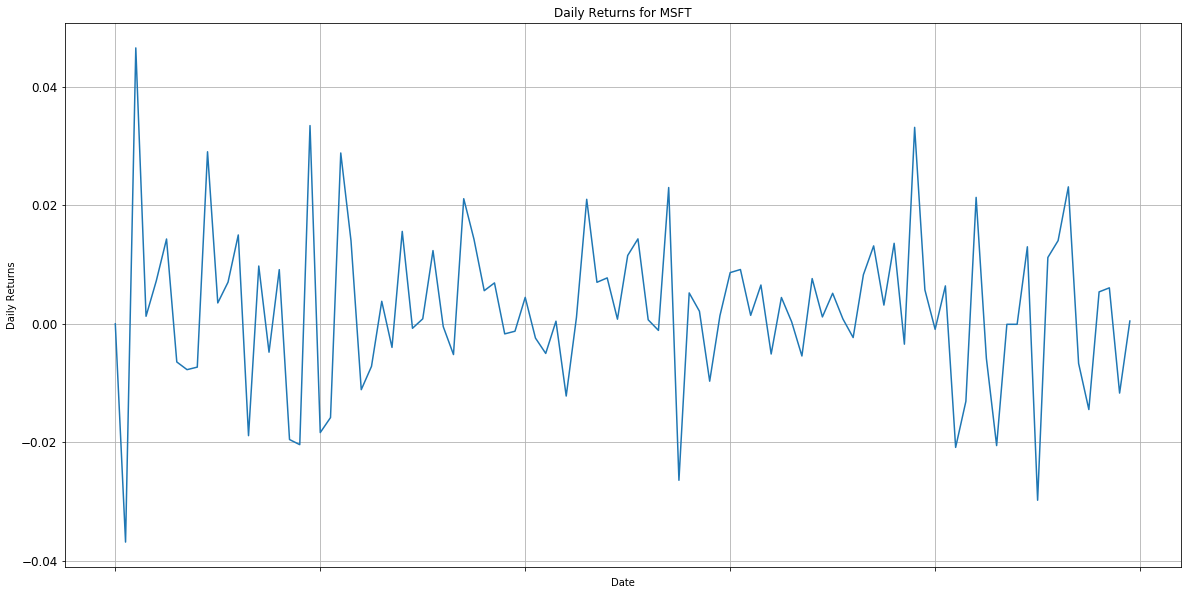

In [392]:
dr = get_daily_returns(MSFT[0]['5. adjusted close'])
ax = dr.plot(title='Daily Returns for MSFT', fontsize=12)
ax.set_xlabel('Date')
ax.set_ylabel('Daily Returns')
plt.grid()
plt.show()

## Computing Cumulative Returns

Computing cumulative returns involves...`

In [327]:
def cumReturn(inputStock):
    stockClose = pd.Series(inputStock)

    returns = stockClose / stockClose.shift(1) - 1
    newReturns = (returns + 1).cumprod()[len(returns)-1] - 1
    
    return newReturns

print ("Cumualtive return for MSFT is {0}%".format(cumReturn(MSFT[0]['5. adjusted close'])*100))

Cumualtive return for MSFT is 25.83543906341117%


## Standard Deviation of Daily Returns

Standard deviation of daily returns is essentially a calculation of volatility.

In [393]:
print("The Standard Deviation of Daily Returns is {0}.".format(dr.std()))

The Standard Deviation of Daily Returns is 0.013569930474502731.


## Sharpe Ratio 

Sharpe ratio is simply...

In [255]:
def sharpe_ratio(inputStock, frequency="daily"):
    
    dailyReturn =  get_daily_returns(MSFT[0]['5. adjusted close'])

    if frequency == "daily":
        annualization_factor = np.sqrt(252)
    elif frequency == "monthly":
        annualization_factor = np.sqrt(12)
    else:
        annualization_factor = 1
        
    sr = annualization_factor * (dailyReturn.mean() / dailyReturn.std())
    
    return sr

print("The daily sharpe_ratio is {0}.".format(sharpe_ratio(MSFT[0]['5. adjusted close'])))
print("The monthly sharpe_ratio is {0}.".format(sharpe_ratio(MSFT[0]['5. adjusted close'], "monthly")))

The daily sharpe_ratio is 2.797727436519308.
The monthly sharpe_ratio is 0.6105141786525946.


## Assessing an Entire Portfolio!

Now that we have the metrics, methodology and code in place to assess the performance of a stock. I think it's time we construct a portfolio and assess it!

### Function to Display Portfolio Statistics

Let's create a function to display some helpful statistics about our portfolio!

In [545]:
import time

#store data here to avoid API usage
stockDataList = []

def portfolioStatistics(inputStocks, stocksAlloc): 
    
    ts = TimeSeries(key='R9PCESGM8SQRD71G', output_format='pandas', indexing_type='date')    
    
    dailyReturn = 0
    sharpeRatio = 0
    stdDailyReturn = 0
    cumulativeReturn = 0
    stdDailyReturn = 0
    
    for stockName in inputStocks: #store data to a list so we don't abuse API call
        stockDataList.append(ts.get_daily_adjusted(stockName, outputsize='compact')[0]['5. adjusted close'])
        time.sleep(1) #delay to prevent timeout issues
        
    for x in range(len(inputStocks)):
        dailyReturn += get_daily_returns(stockDataList[x]).mean() * stocksAlloc[x]
        cumulativeReturn += cumReturn(stockDataList[x]) * stocksAlloc[x]
        stdDailyReturn += get_daily_returns(stockDataList[x]).std() * stocksAlloc[x]
        #print (get_daily_returns(stockDataList[x]).mean() * stocksAlloc[x])
        
    sharpeRatio = np.sqrt(252) * (dailyReturn/stdDailyReturn)
    
    print ("====================Welcome to your portfolio!====================")
    print ("Start Date: 2019-01-02")
    print ("End Date: 2019-05-24")
    print ("Stock Assets: {0}".format(inputStocks))
    print ("Stock Allocations: {0}".format(stocksAlloc))
    print ("Sharpe Ratio: {0}".format(sharpeRatio))
    print ("Volatility / std of daily returns: {0}".format(stdDailyReturn))
    print ("Average Daily Return: {0}".format(dailyReturn))
    print ("Cumulative Return: {0}".format(cumulativeReturn))
    print ("=========================Make some money!=========================")
    
            

inputStocks = ['MSFT','AAPL', 'GOOGL', 'TSLA']
stocksAlloc = [0.5,0.25,0.3,0.5]
portfolioStatistics(inputStocks, stocksAlloc)

====================Welcome to your portfolio!====================
Start Date: 2019-01-02
End Date: 2019-05-24
Stock Assets: ['MSFT', 'AAPL', 'GOOGL', 'TSLA']
Stock Allocations: [0.5, 0.25, 0.3, 0.5]
Sharpe Ratio: -0.17311671649525404
Volatility / std of daily returns: 0.03169596489359183
Average Daily Return: -0.0003456548961839486
Cumulative Return: -0.003951734450179045
=========================Make some money!=========================


### Function to Get Daily Portfolio Value

So what we did here...

In [533]:
def dailyPortfolioValue(stockDataList):
    tempStockList = stockDataList
    tempCryptoList = cryptoDataList
    
    for x in range (len(tempStockList)):
        for y in range(len(tempStockList[x])):
            tempStockList[x][y] = tempStockList[x][y] * stocksAlloc[x]

    for x in range (len(tempStockList)):
        for y in range(len(tempStockList[x])):
            tempStockList[0][y] += tempStockList[x][y] 
                        
    ourPortfolio = pd.DataFrame(tempStockList[0])

    return ourPortfolio

In [538]:
ourPortfolio = dailyPortfolioValue(stockDataList)
ourPortfolio.head()

,5. adjusted close
date,
2019-01-02,5.300787e+38
2019-01-03,5.110906e+38
2019-01-04,5.356499e+38
2019-01-07,5.356638e+38
2019-01-08,5.400364e+38


### Chart Our Portfolio

Finally let's chart our portfolio and compare its performance against the S&P500. We normalized...

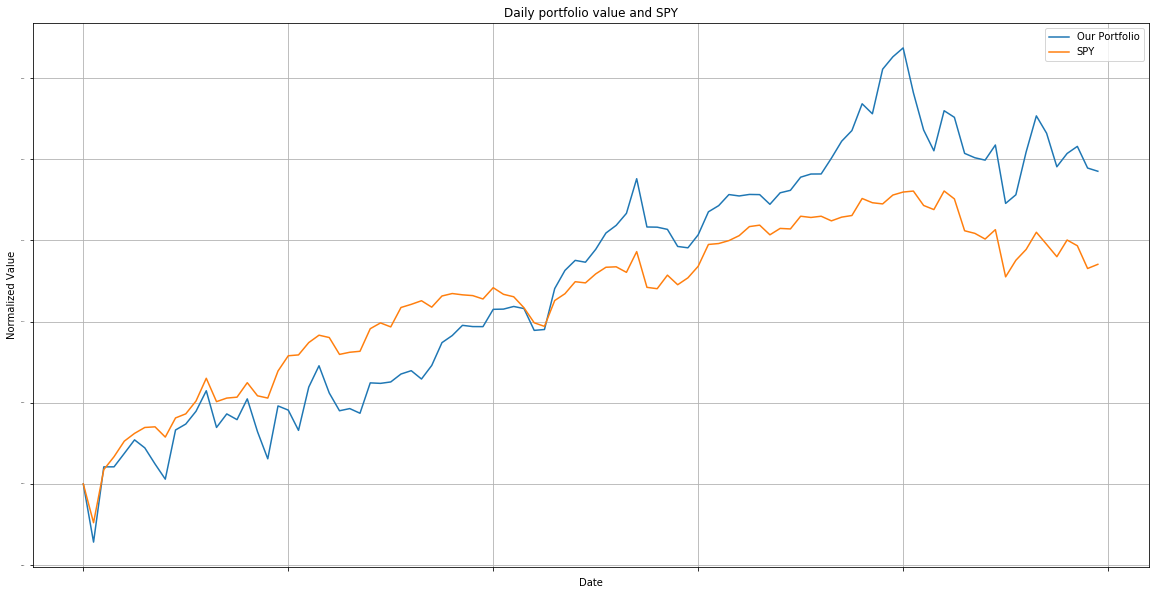

In [539]:
df_temp = pd.concat([ourPortfolio['5. adjusted close'], SPY[0]['5. adjusted close']], keys=['Our Portfolio', 'SPY'], axis=1)

df_temp = df_temp/df_temp.iloc[0,:]
ax = df_temp.plot(title="Daily portfolio value and SPY", fontsize=2)
ax.set_xlabel("Date")
ax.set_ylabel("Normalized Value")
plt.grid()
plt.show()